<a href="https://colab.research.google.com/github/Beebek4/QMMLHackathon_CNN/blob/main/Residual%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import csv
from torchvision import transforms, datasets
from PIL import Image

import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

import zipfile
# Define the path to your zip file
# file_path = '/content/the-queen-mary-machine-learning-hackathon-february.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # zip_ref.extractall('/content/actual_data')  # Replace 'destination_folder' with your desired folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !kaggle competitions download -c the-queen-mary-machine-learning-hackathon-february only download once

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)

elif torch.backends.cuda.is_built():
    device = torch.device("cuda")
    x = torch.ones(1, device=device)
    print (x)
else:
  print("MPS Device is not found")

tensor([1.], device='cuda:0')


In [ ]:
# Define transformations
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

TRAIN_DATA_DIR = '/content/actual_data/train/train'
TEST_DATA_DIR = '/content/actual_data/test/test'

# Load ImageNette dataset
trainset = torchvision.datasets.ImageFolder(
        TRAIN_DATA_DIR, transform=transform
    )
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)


# testset= torchvision.datasets.ImageFolder(
#         TEST_DATA_DIR, transform=transform
#     )
# test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=4)

FileNotFoundError: Couldn't find any class folder in /content/actual_data/test/test.

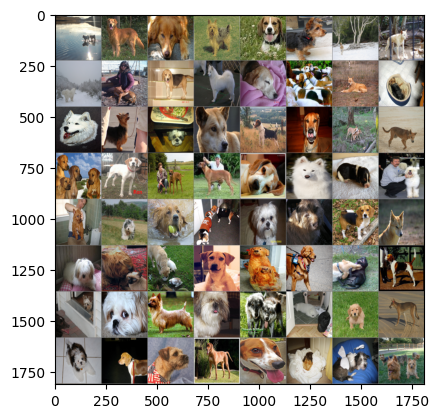

In [ ]:
# Let's show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
	img = img / 2 + 0.5  # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
#Create the CNN model!
  #add the residual function inside loop


class ResNetSilicon(nn.Module):
  def __init__(self):
      super().__init__()


      # The first 7x7 conv layer
      self.conv0 = nn.Conv2d(
          in_channels=3, out_channels=64,
          kernel_size=(7, 7),
          stride=2, padding=3, bias=False,
      )
      self.bn0 = nn.BatchNorm2d(num_features=64)
      self.relu0 = nn.ReLU()
      self.maxpool0 = nn.MaxPool2d(
           kernel_size=(3, 3), stride=2, padding=1,
      )


      # First part of first convolution block
      self.conv1_1 = nn.Conv2d(
          in_channels=64, out_channels=64,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn1_1 = nn.BatchNorm2d(num_features=64)
      self.relu1_1 = nn.ReLU()
      self.conv1_2 = nn.Conv2d(
          in_channels=64, out_channels=64,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn1_2 = nn.BatchNorm2d(num_features=64)

      # run the residual function


      self.relu1_2 = nn.ReLU()
      # Second part of first convolution block
      self.conv1_3 = nn.Conv2d(
          in_channels=64, out_channels=64,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn1_3 = nn.BatchNorm2d(num_features=64)
      self.relu1_3 = nn.ReLU()

      self.conv1_4 = nn.Conv2d(
          in_channels=64, out_channels=64,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
        )
      self.bn1_4 = nn.BatchNorm2d(num_features=64)
      self.relu1_4 = nn.ReLU()

      # First part of second convolution block, this layer changes features to 128
      self.conv2_1 = nn.Conv2d(
          in_channels=64, out_channels=128,
          kernel_size=(3,3),
          stride=2, padding=1, bias=False,
      )
      self.bn2_1 = nn.BatchNorm2d(num_features=128)
      self.relu2_1 = nn.ReLU()

      self.conv2_2 = nn.Conv2d(
          in_channels=128, out_channels=128,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn2_2 = nn.BatchNorm2d(num_features=128)
      self.relu2_2 = nn.ReLU()

      self.dim_match_conv1 = nn.Conv2d(
          in_channels=64, out_channels=128,
          kernel_size=(1,1),
          stride=2, bias=False,
      )
      self.dim_match_bn_1 = nn.BatchNorm2d(128)
      self.dim_match_relu_1 = nn.ReLU()

      # Second part of second convolution block
      self.conv2_3 = nn.Conv2d(
          in_channels=128, out_channels=128,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn2_3 = nn.BatchNorm2d(num_features=128)
      self.relu2_3 = nn.ReLU()

      self.conv2_4 = nn.Conv2d(
          in_channels=128, out_channels=128,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn2_4 = nn.BatchNorm2d(num_features=128)
      self.relu2_4 = nn.ReLU()

      self.relu_after_add_1 = nn.ReLU()

      # First part of third convolution block
      self.conv3_1 = nn.Conv2d(
          in_channels=128, out_channels=256,
          kernel_size=(3,3),
          stride=2, padding=1, bias=False,
      )
      self.bn3_1 = nn.BatchNorm2d(num_features=256)
      self.relu3_1 = nn.ReLU()

      self.conv3_2 = nn.Conv2d(
          in_channels=256, out_channels=256,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn3_2 = nn.BatchNorm2d(num_features=256)
      self.relu3_2 = nn.ReLU()

      self.dim_match_conv2 = nn.Conv2d(
          in_channels=128, out_channels=256,
          kernel_size=(1,1),
          stride=2, bias=False,
      )
      self.dim_match_bn_2 = nn.BatchNorm2d(256)
      self.dim_match_relu_2 = nn.ReLU()

      # Second part of third convolution block
      self.conv3_3 = nn.Conv2d(
          in_channels=256, out_channels=256,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn3_3 = nn.BatchNorm2d(num_features=256)
      self.relu3_3 = nn.ReLU()

      self.conv3_4 = nn.Conv2d(
          in_channels=256, out_channels=256,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn3_4 = nn.BatchNorm2d(num_features=256)
      self.relu3_4 = nn.ReLU()

      self.relu_after_add_2 = nn.ReLU()

      # First part of fourth convolution block
      self.conv4_1 = nn.Conv2d(
          in_channels=256, out_channels=512,
          kernel_size=(3,3),
          stride=2, padding=1, bias=False,
      )
      self.bn4_1 = nn.BatchNorm2d(num_features=512)
      self.relu4_1 = nn.ReLU()

      self.conv4_2 = nn.Conv2d(
          in_channels=512, out_channels=512,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn4_2 = nn.BatchNorm2d(num_features=512)
      self.relu4_2 = nn.ReLU()

      self.dim_match_conv3 = nn.Conv2d(
          in_channels=256, out_channels=512,
          kernel_size=(1,1),
          stride=2, bias=False,
      )
      self.dim_match_bn_3 = nn.BatchNorm2d(512)
      self.dim_match_relu_3 = nn.ReLU()


      # Second part of fourth convolution block
      self.conv4_3 = nn.Conv2d(
          in_channels=512, out_channels=512,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn4_3 = nn.BatchNorm2d(num_features=512)
      self.relu4_3 = nn.ReLU()

      self.conv4_4 = nn.Conv2d(
          in_channels=512, out_channels=512,
          kernel_size=(3,3),
          stride=1, padding=1, bias=False,
      )
      self.bn4_4 = nn.BatchNorm2d(num_features=512)
      self.relu4_4 = nn.ReLU()

      self.relu_after_add_3 = nn.ReLU()

      # Avg pool out put and pass through a FC connected layer which has 10 outputs for CIFAR10
      # (Change to 1000 for ImageNet)
      self.global_avg_pool = nn.AdaptiveAvgPool2d(
          output_size=(1,1)
      )

      # Final FC layer - 10 for CIFAR 1000 for ImageNette
      self.fc1 = nn.Linear(
          in_features=512, out_features=10
          #in_features=512, out_features=1000
      )

  def forward(self, x):
    x = self.conv0(x)
    x = self.bn0(x)
    x = self.relu0(x)
    x = self.maxpool0(x)
    res_x = x.detach().clone()  # The x to be passed forward to the +2 layer
    #print(f'dim after init conv: {x.shape}')

    # First residual block of first convolution block
    x = self.conv1_1(x)
    x = self.bn1_1(x)
    x = self.relu1_1(x)
    x = self.conv1_2(x)
    x = self.bn1_2(x)
    x = self.relu1_2(x)
    x = x + res_x
    # res_x = x.detach().clone()  This might be the wrong approach for making res_x
    res_x = x
    #print(f'dim after first res block in first convolution block {x.shape}')

    # Second residual block of first convolution block
    x = self.conv1_3(x)
    x = self.bn1_3(x)
    x = self.relu1_3(x)
    x = self.conv1_3(x)
    x = self.bn1_3(x)
    x = self.relu1_3(x)
    x = x + res_x
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after second res block in first conv block {x.shape}')

    # First residual block of second convolution block
    x = self.conv2_1(x)
    x = self.bn2_1(x)
    x = self.relu2_1(x)
    x = self.conv2_2(x)
    x = self.bn2_2(x)
    x = self.relu2_2(x)

    # Must perform a (1x1) convolution on res_x to make the dimensions match
    res_x = self.dim_match_conv1(res_x)
    res_x = self.dim_match_bn_1(res_x)
    #print(f'dim res_x after 1x1 convolution: {res_x.shape}')
    x = x + res_x
    x = self.dim_match_relu_1(x)
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after first res block in second convolution block {x.shape}')

    x = self.conv2_3(x)
    x = self.bn2_3(x)
    x = self.relu2_3(x)
    x = self.conv2_4(x)
    x = self.bn2_4(x)
    x = self.relu2_4(x)
    x = x + res_x
    x = self.relu_after_add_1(x)
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after second res block in second conv block {x.shape}')

    # First residual block of third conv block
    x = self.conv3_1(x)
    x = self.bn3_1(x)
    x = self.relu3_1(x)
    x = self.conv3_2(x)
    x = self.bn3_2(x)
    x = self.relu3_2(x)

    # Must perform a (1x1) conv on res_x to make the dimensions match
    res_x = self.dim_match_conv2(res_x)
    res_x = self.dim_match_bn_2(res_x)
    #print(f'dim res_x after 1x1 conv: {res_x.shape}')
    x = x + res_x
    x = self.dim_match_relu_2(x)
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after first res block in third conv block {x.shape}')

    # Second residual block of third conv block
    x = self.conv3_3(x)
    x = self.bn3_3(x)
    x = self.relu3_3(x)
    x = self.conv3_4(x)
    x = self.bn3_4(x)
    x = self.relu3_4(x)
    x = x + res_x
    x = self.relu_after_add_2(x)
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after second res block in third conv block {x.shape}')

    # First residual block of fourth conv block
    x = self.conv4_1(x)
    x = self.bn4_1(x)
    x = self.relu4_1(x)
    x = self.conv4_2(x)
    x = self.bn4_2(x)
    x = self.relu4_2(x)

    # Must perform a (1x1) conv on res_x to make the dimensions match
    res_x = self.dim_match_conv3(res_x)
    res_x = self.dim_match_bn_3(res_x)
    #print(f'dim res_x after 1x1 conv: {res_x.shape}')
    x = x + res_x
    x = self.dim_match_relu_3(x)
    #res_x = x.detach().clone()
    res_x = x
    #print(f'dim after first res block in fourth conv block {x.shape}')

    # Second residual block of third conv block
    x = self.conv4_3(x)
    x = self.bn4_3(x)
    x = self.relu4_3(x)
    x = self.conv4_4(x)
    x = self.bn4_4(x)
    x = self.relu4_4(x)
    x = x + res_x
    x = self.relu_after_add_3(x)
    # res_x = x.detach().clone()
    #print(f'dim after second res block in fourth conv block {x.shape}')

    x = self.global_avg_pool(x)
    #print(f'dim after global avg pool: {x.shape}')
    # Flatten after pooling to make output into a vector ready for FC layer
    x = torch.flatten(x, start_dim=1)
    #print(f'dim after flatten: {x.shape}')

    # Final fc layer
    x = self.fc1(x)
    #print(f'Final output dim: {x.shape}')

    return x

def kaiming_uniform_init(net):
    if isinstance(net, nn.Conv2d):
        nn.init.kaiming_normal_(net.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(net, nn.BatchNorm2d):
        nn.init.constant_(net.weight, 1)
        nn.init.constant_(net.bias, 0)

model = ResNetSilicon()
model.apply(kaiming_uniform_init)
model.to(device)

def kaiming_uniform_init(net):
    if isinstance(net, nn.Conv2d):
        nn.init.kaiming_normal_(net.weight, mode='fan_out', nonlinearity='relu')
    elif isinstance(net, nn.BatchNorm2d):
        nn.init.constant_(net.weight, 1)
        nn.init.constant_(net.bias, 0)

model = ResNetSilicon()
model.apply(kaiming_uniform_init)
model.to(device)



ResNetSilicon(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU()
  (maxpool0): MaxPool2d(kernel_size=(3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_2): ReLU()
  (conv1_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_3): ReLU()
  (conv1_4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [ ]:
#training DONT RUN YET

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, weight_decay=0.0001, momentum=0.9)

# Define learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [ ]:
model.eval()
for epoch in range(1):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}] training loss: {train_loss:.3f}')


model.eval()





# Define the transformations you used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Ensure images are RGB
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0) == 1 else x),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Open the CSV file for writing
with open('submission_file.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['ID', 'Prediction'])

    # Iterate through the images in the test directory
    for filename in os.listdir(test_dir):
        image_path = os.path.join(test_dir, filename)
        image = Image.open(image_path)

        # Preprocess the image
        image = transform(image)

        # Add a batch dimension
        image = image.unsqueeze(0).to(device)

        # Pass the image through the model
        with torch.no_grad():
            output = model(image)

        # Get the predicted class
        _, predicted_class = torch.max(output, 1)
        prediction = predicted_class.item()

        # Write the ID and prediction to the CSV
        csv_writer.writerow([filename.strip('.JPEG'), prediction])



    # Validation phase
    # model.eval()  # Set model to evaluation mode
    # val_running_loss = 0.0
    # val_correct = 0
    # val_total = 0
    # with torch.no_grad():
    #     for data in test_trainer:  # Assuming test_loader is used as a validation loader
    #         inputs, labels = data
    #         inputs, labels = inputs.to(device), labels.to(device)

    #         outputs = model(inputs)
    #         loss = criterion(outputs, labels)

    #         val_running_loss += loss.item()
    #         _, predicted = torch.max(outputs.data, 1)
    #         val_total += labels.size(0)
    #         val_correct += (predicted == labels).sum().item()

    # val_loss = val_running_loss / len(test_loader)
    # val_accuracy = 100 * val_correct / val_total
    # print(f'Epoch [{epoch + 1}] validation loss: {val_loss:.3f}, accuracy: {val_accuracy:.2f}%')

    # # Update the LR scheduler with validation loss
    # scheduler.step(val_loss)
    # print(f'LR: {scheduler.get_last_lr()}')

NameError: name 'model' is not defined